In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

path = "C:/Users/Phillip/Pictures/Box Sync/My Python Programs/Data Science/us-education-datasets-unification-project/states_all.csv"

education_df = pd.read_csv(path)

In [53]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = education_df["STATE"].unique()

for state in states:
    education_df.loc[education_df["STATE"] == state, fill_list] = education_df.loc[education_df["STATE"] == state, fill_list].interpolate()

# we drop the null values after interpolation
education_df.dropna(inplace=True)

In [54]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 204 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     466 non-null object
STATE                           466 non-null object
YEAR                            466 non-null int64
ENROLL                          466 non-null float64
TOTAL_REVENUE                   466 non-null float64
FEDERAL_REVENUE                 466 non-null float64
STATE_REVENUE                   466 non-null float64
LOCAL_REVENUE                   466 non-null float64
TOTAL_EXPENDITURE               466 non-null float64
INSTRUCTION_EXPENDITURE         466 non-null float64
SUPPORT_SERVICES_EXPENDITURE    466 non-null float64
OTHER_EXPENDITURE               466 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      466 non-null float64
GRADES_PK_G                     466 non-null float64
GRADES_KG_G                     466 non-null float64
GRADES_4_G                      466 non-null float64
GRADES_8_G                      466 non-null flo

In [55]:
education_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,...,466.000000,466.000000,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.000000,466.000000
mean,2008.577253,9.444830e+05,1.081519e+07,9.580231e+05,5.011699e+06,4.845469e+06,1.089849e+07,5.650708e+06,3.188074e+06,4.922479e+05,...,72531.345494,72920.954936,64806.416309,5.837301e+05,2.867842e+05,8.935117e+05,236.909728,279.802668,219.508638,263.789943
std,5.779779,1.122384e+06,1.358235e+07,1.331475e+06,6.411774e+06,6.338172e+06,1.375873e+07,7.262925e+06,3.840561e+06,6.014541e+05,...,86460.436575,85834.653148,77546.862443,6.925375e+05,3.407958e+05,1.060033e+06,8.695903,9.381511,7.426546,6.875627
min,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,2.041170e+05,2.310700e+04,...,3423.000000,2860.000000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,2005.000000,2.774370e+05,2.712660e+06,2.614470e+05,1.491747e+06,9.635558e+05,2.670300e+06,1.416288e+06,8.472295e+05,1.296515e+05,...,20489.750000,20880.250000,18527.750000,1.666395e+05,8.194400e+04,2.596278e+05,232.760641,274.707118,215.338956,259.661771
50%,2009.000000,6.659445e+05,6.139972e+06,5.601350e+05,3.034960e+06,2.467272e+06,6.317938e+06,3.193509e+06,1.908255e+06,3.304065e+05,...,50918.000000,50114.500000,41790.000000,4.083570e+05,1.871180e+05,6.282085e+05,238.394124,281.531587,221.130461,265.217081
75%,2013.000000,1.018588e+06,1.222407e+07,1.040284e+06,6.260627e+06,5.488079e+06,1.195951e+07,6.154768e+06,3.667420e+06,5.666548e+05,...,79929.500000,80949.750000,75641.250000,6.424952e+05,3.234915e+05,9.758625e+05,242.602566,286.197041,224.531280,268.307884
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,280.499130


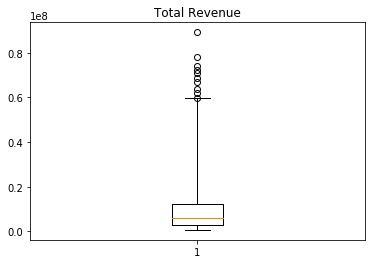

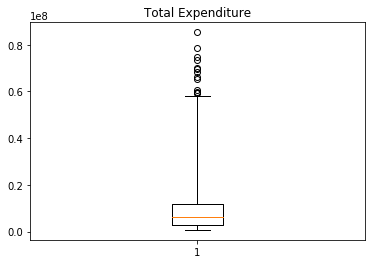

In [56]:
plt.boxplot(education_df['TOTAL_REVENUE'], whis = 5)
plt.title('Total Revenue')
plt.show()
plt.boxplot(education_df['TOTAL_EXPENDITURE'], whis = 5)
plt.title('Total Expenditure')

plt.show()

    outliers are present!
    

In [57]:
from scipy.stats.mstats import winsorize

win_rev = winsorize(education_df['TOTAL_REVENUE'], (0, .05))

win_exp = winsorize(education_df['TOTAL_EXPENDITURE'], (0, .05))

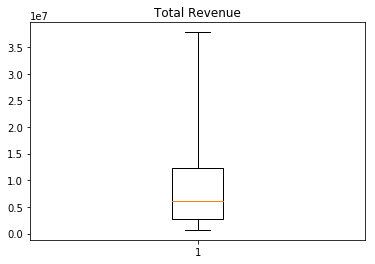

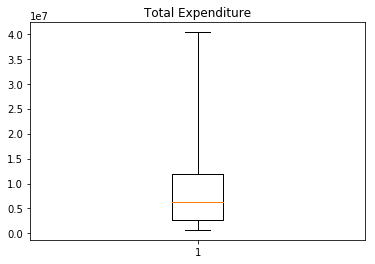

In [58]:
plt.boxplot(win_rev, whis = 5)
plt.title('Total Revenue')
plt.show()
plt.boxplot(win_exp, whis = 5)
plt.title('Total Expenditure')

plt.show()

    no outliers present!

In [59]:
deficit = education_df.TOTAL_REVENUE - education_df.TOTAL_EXPENDITURE 

# what's the difference between df.column and df['column']

Text(0.5, 1.0, 'Deficit')

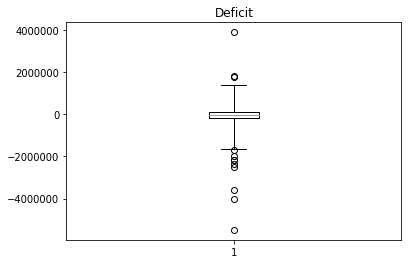

In [60]:
plt.boxplot(deficit, whis = 5)
plt.title('Deficit')

In [61]:
win_def = winsorize(deficit, (.05,.05))

Text(0.5, 1.0, 'Deficit')

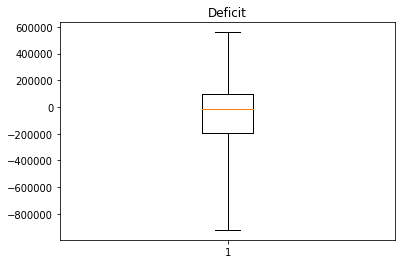

In [62]:
plt.boxplot(win_def, whis= 5)
plt.title('Deficit')

In [63]:
deficit2 = win_rev - win_exp


Text(0.5, 1.0, 'Deficit from Winsorize')

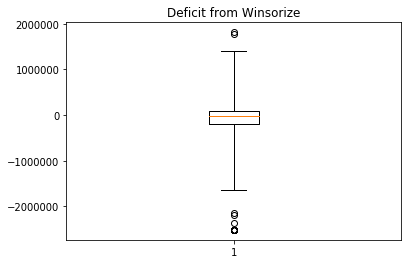

In [64]:
plt.boxplot(deficit2, whis = 5)
plt.title('Deficit from Winsorize')

    outliers present!

In [65]:
win_def2 = winsorize(deficit2, (0.05, 0.05))

Text(0.5, 1.0, 'Deficit from Winsorize')

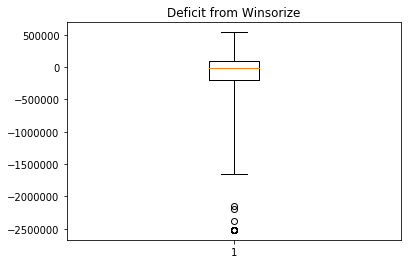

In [66]:
plt.boxplot(win_def2, whis = 5)
plt.title('Deficit from Winsorize')

In [67]:
pd.DataFrame({'budget_before': deficit, 'winsorize_bud': win_def, 'winsorized_bud2': win_def2}).describe()

,budget_before,winsorize_bud,winsorized_bud2
count,4.660000e+02,466.000000,4.660000e+02
mean,-8.329761e+04,-61210.328326,-1.736360e+05
std,6.148962e+05,342588.030357,6.502740e+05
min,-5.487742e+06,-921134.000000,-2.518429e+06
25%,-1.965748e+05,-196574.750000,-2.047750e+05
50%,-1.282350e+04,-12823.500000,-1.460050e+04
75%,9.852350e+04,98523.500000,9.184800e+04
max,3.897129e+06,560511.000000,5.400550e+05


the number vary widely.  It's hard to know when is the best time to winsorize!  Which values are truest??

(array([300.,  88.,  32.,  21.,   3.,   5.,   7.,   4.,   4.,   2.]),
 array([  703245.        ,  9164933.8       , 17626622.6       ,
        26088311.4       , 34550000.2       , 43011689.        ,
        51473377.8       , 59935066.60000001, 68396755.4       ,
        76858444.2       , 85320133.        ]),
 <a list of 10 Patch objects>)

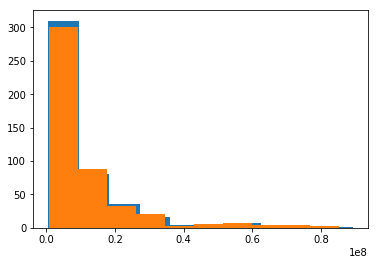

In [69]:
plt.hist(education_df['TOTAL_REVENUE'])
plt.hist(education_df['TOTAL_EXPENDITURE'])


(array([  1.,   1.,   1.,   5.,  22., 339.,  90.,   6.,   0.,   1.]),
 array([-5487742. , -4549254.9, -3610767.8, -2672280.7, -1733793.6,
         -795306.5,   143180.6,  1081667.7,  2020154.8,  2958641.9,
         3897129. ]),
 <a list of 10 Patch objects>)

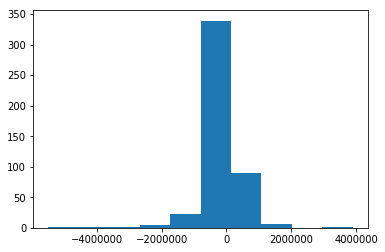

In [70]:
plt.hist(deficit)

(array([ 31.,  11.,  12.,  16.,  57.,  75., 157.,  48.,  17.,  42.]),
 array([-921134. , -772969.5, -624805. , -476640.5, -328476. , -180311.5,
         -32147. ,  116017.5,  264182. ,  412346.5,  560511. ]),
 <a list of 10 Patch objects>)

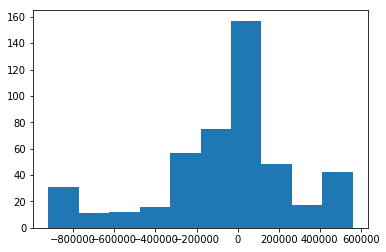

In [71]:
plt.hist(win_def)

(array([ 27.,   0.,   3.,   8.,  31., 274.,  95.,  19.,   6.,   3.]),
 array([-2518429. , -2084892.9, -1651356.8, -1217820.7,  -784284.6,
         -350748.5,    82787.6,   516323.7,   949859.8,  1383395.9,
         1816932. ]),
 <a list of 10 Patch objects>)

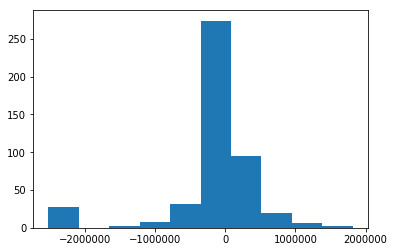

In [72]:
plt.hist(deficit2)

(array([ 25.,   2.,   1.,   2.,   3.,  11.,  21., 113., 225.,  63.]),
 array([-2518429. , -2212580.6, -1906732.2, -1600883.8, -1295035.4,
         -989187. ,  -683338.6,  -377490.2,   -71641.8,   234206.6,
          540055. ]),
 <a list of 10 Patch objects>)

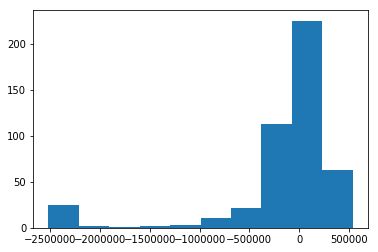

In [73]:
plt.hist(win_def2)